In [26]:
import sys
import os
import shutil
import subprocess
import logging

import numpy as np
import nibabel as nib

import pandas as pd
import itk
import skimage
import matplotlib.pyplot as plt

import SimpleITK as sitk
from scipy.signal import medfilt
from helper_mri import *

In [14]:
# change paths to your data here
img_path = 'data/sub-pixar155_T1w.nii.gz' # input raw t1 MRI path
output_path = 'output/'
age = 7 # age of subject

age_ranges = {"mni_templates/nihpd_asym_04.5-08.5_t1w.nii" : {"min_age":3, "max_age":7},
                "mni_templates/nihpd_asym_07.5-13.5_t1w.nii": {"min_age":8, "max_age":13},
                "mni_templates/nihpd_asym_13.0-18.5_t1w.nii": {"min_age":14, "max_age":35}}

In [18]:
def select_template_based_on_age(age):
    for golden_file_path, age_values in age_ranges.items():
        if age_values['min_age'] <= int(age) and int(age) <= age_values['max_age']: 
            print(golden_file_path)
            return golden_file_path

('R', 'A', 'S')


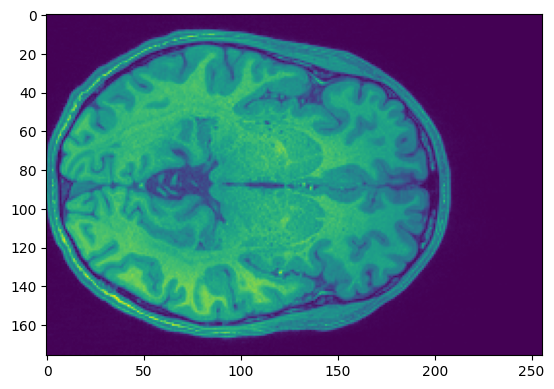

In [16]:
# load image
image, affine = load_nii(img_path)
plt.imshow(image[:,:,140])
print(nib.aff2axcodes(affine))

## Register to MNI template

In [27]:
# path to store registered image in
new_path_to = output_path+img_path.split("/")[-1].split(".")[0]
if not os.path.exists(new_path_to):
    os.mkdir(new_path_to)
new_path_nii = output_path +  "registered.nii.gz"

# register image to MNI template
golden_file_path = select_template_based_on_age(age)
print("Registering to template:", golden_file_path, new_path_nii)
register_to_template(img_path, new_path_nii, golden_file_path)

mni_templates/nihpd_asym_04.5-08.5_t1w.nii
Registering to template: mni_templates/nihpd_asym_04.5-08.5_t1w.nii output/registered.nii.gz


AttributeError: module 'itk' has no attribute 'imread'

In [ ]:
!pip uninstall -y itk-elastix

In [ ]:
!pip install itk-elastix

In [30]:
import itk
fixed_image = itk.imread(fixed_image_path, itk.F)


AttributeError: module 'itk' has no attribute 'imread'

## Normalize image

In [ ]:
# enchance and zscore normalize image
if not os.path.exists(new_path_to+"/no_z"):
    os.mkdir(new_path_to+"/no_z")
    
image_sitk =  sitk.ReadImage(new_path_to+"/registered.nii.gz")
image_array  = sitk.GetArrayFromImage(image_sitk)
image_array = enhance_noN4(image_array)
image3 = sitk.GetImageFromArray(image_array)

sitk.WriteImage(image3,new_path_to+"/no_z/registered_no_z.nii") 
cmd_line = "zscore-normalize "+new_path_to+"/no_z/registered_no_z.nii -o "+new_path_to+'/registered_z.nii'
subprocess.getoutput(cmd_line)     
print(cmd_line)
print("Preprocessing done!")